In [1]:
import sys
print(f"Python utilisé: {sys.executable}")

Python utilisé: /Users/a/tf_env/bin/python


[*********************100%***********************]  1 of 1 completed


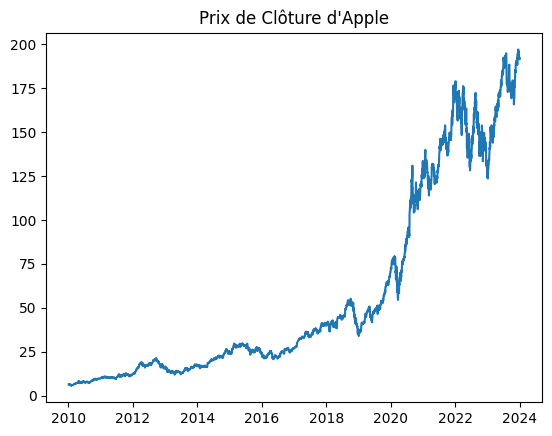

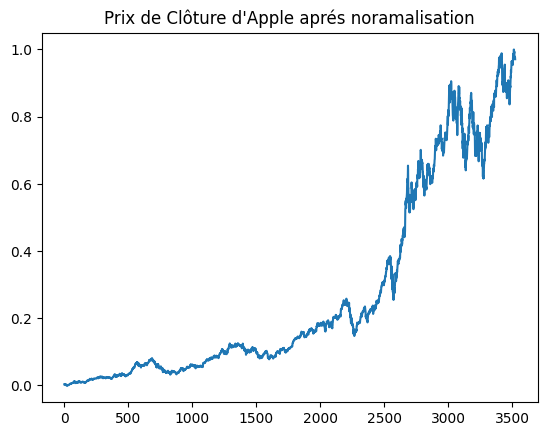

In [2]:
import yfinance as yf
# Charger les données
ticker = 'AAPL'  # Par exemple, les données de l'action Apple
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')
# Visualisation des données
import matplotlib.pyplot as plt
plt.plot(data['Close'])
plt.title('Prix de Clôture d\'Apple')
plt.show()
# Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

plt.plot(scaled_data)
plt.title('Prix de Clôture d\'Apple aprés noramalisation')
plt.show()

# Création des séquences
import numpy as np
import pandas as pd
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Division en ensembles d'entraînement et de test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

# Définition du modèle RNN
model_rnn = Sequential([
    Input(shape=(seq_length, 1)),          # Couche Input pour spécifier la forme d'entrée
    SimpleRNN(units=50, activation='tanh'),# Couche SimpleRNN avec 50 unités (sans input_shape)
    Dense(1, activation='sigmoid')         # Couche Dense avec 1 neurone en sortie
])

In [7]:
# Compilation du modèle
model_rnn.compile(optimizer='adam', loss='mse')

In [8]:
# Entraînement du modèle
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0490 - val_loss: 0.1358
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 0.0428
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0286
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0256e-04 - val_loss: 0.0233
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6822e-04 - val_loss: 0.0201
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2388e-04 - val_loss: 0.0160
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8020e-04 - val_loss: 0.0141
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4777e-04 - val_loss: 0.0121
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1564e-04 - val_loss: 0.0127
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3278e-04 - val_loss: 0.0114
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2795e-04 - val_loss: 0.0110
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 

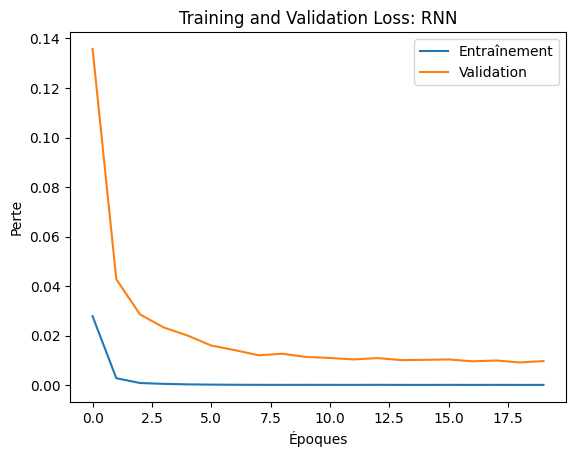

In [11]:
import matplotlib.pyplot as plt
# Tracer l'historique de l'entraînement
plt.plot(history_rnn.history['loss'], label='Entraînement')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050     
RNN Test Loss: 0.009732713922858238
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


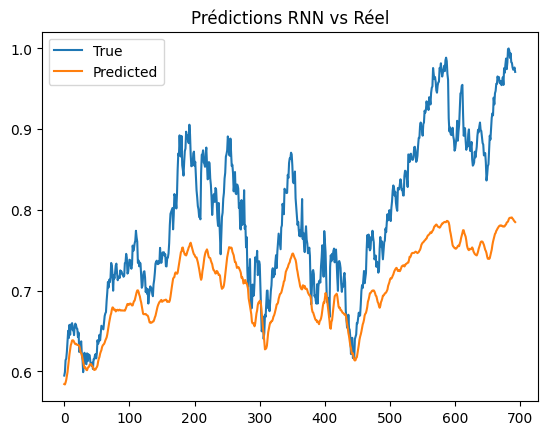

In [12]:
# Évaluation du modèle
loss_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Loss: {loss_rnn}")

# Prédictions
predictions_rnn = model_rnn.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(predictions_rnn, label='Predicted')
plt.legend()
plt.title('Prédictions RNN vs Réel')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Définition du modèle LSTM avec différentes fonctions d'activation
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),  # Utilisation de la fonction d'activation tanh
    Dense(1, activation='sigmoid')  # Utilisation de la fonction d'activation sigmoid pour la sortie
])


In [16]:
# Compilation du modèle
model_lstm.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0761 - val_loss: 0.3560
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0120 - val_loss: 0.0394
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7984e-04 - val_loss: 0.0229
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6100e-04 - val_loss: 0.0193
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9699e-04 - val_loss: 0.0198
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7757e-04 - val_loss: 0.0196
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7303e-04 - val_loss: 0.0184
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9370e-04 - val_loss: 0.0199
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.5843e-04 - val_loss: 0.0182
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6881e-04 - val_loss: 0.0189
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6936e-04 - val_loss: 0.0162
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━

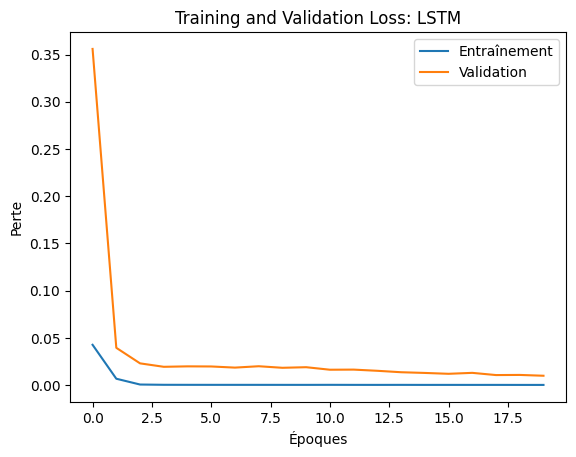

In [17]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_lstm.history['loss'], label='Entraînement')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

In [18]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Définition du modèle LSTM avec deux cellules
model_lstm2 = Sequential([
    LSTM(units=50, activation='tanh', input_shape=(seq_length, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    LSTM(units=20, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

# Affichage du résumé du modèle
model_lstm2.summary()

# Compilation du modèle
model_lstm2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_lstm2 = model_lstm2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,101 (62.89 KB)

 Trainable params: 16,101 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0673 - val_loss: 0.3754
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - val_loss: 0.0369
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8690e-04 - val_loss: 0.0257
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1690e-04 - val_loss: 0.0247
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2457e-04 - val_loss: 0.0240
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3140e-04 - val_loss: 0.0203
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0096e-04 - val_loss: 0.0183
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9478e-04 - val_loss: 0.0181
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6798e-04 - val_loss: 0.0173
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6138e-04 - val_loss: 0.0175
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6569e-04 - val_loss: 0.0157
Epoch 12/20
87/87 ━━━━━━━━━

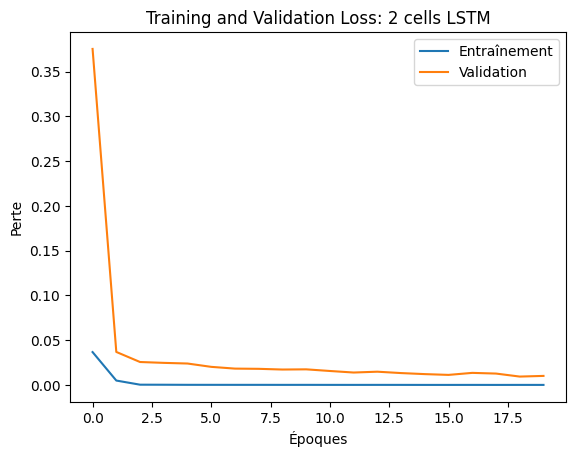

In [19]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_lstm2.history['loss'], label='Entraînement')
plt.plot(history_lstm2.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: 2 cells LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Définition du modèle GRU
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(60, 1)),
    Dense(1, activation='sigmoid')
])

In [21]:
# Affichage du résumé du modèle
model_gru.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compilation du modèle
model_gru.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
hisory_gru = model_gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0822 - val_loss: 0.3098
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0066 - val_loss: 0.0104
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2125e-04 - val_loss: 0.0125
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0386e-04 - val_loss: 0.0119
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6942e-04 - val_loss: 0.0117
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4305e-04 - val_loss: 0.0112
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4965e-04 - val_loss: 0.0100
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5650e-04 - val_loss: 0.0093
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0345e-04 - val_loss: 0.0092
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0185e-04 - val_loss: 0.0086
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8803e-05 - val_loss: 0.0075
Epoch 12/20
87/87 ━━━━━━━━━

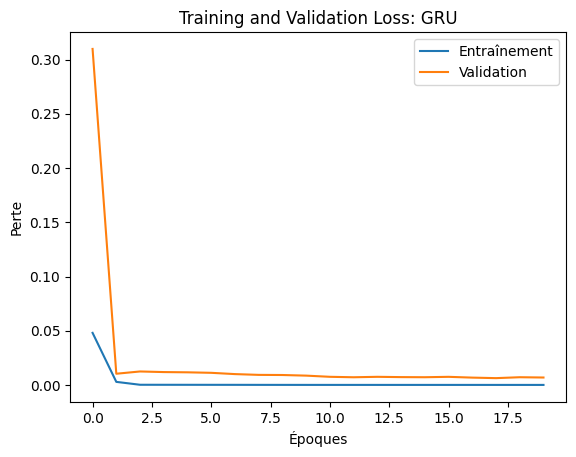

In [23]:
import matplotlib.pyplot as plt

=# Tracer l'historique de l'entraînement
plt.plot(history_gru.history['loss'], label='Entraînement')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [24]:
# Définition du modèle avec deux cellules GRU
model_gru2 = Sequential([
    GRU(units=50, activation='tanh', input_shape=(60, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    GRU(units=50, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')
])
# Compilation du modèle
model_gru2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_gru2 = model_gru2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0713 - val_loss: 0.0037
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1306e-04 - val_loss: 0.0133
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8918e-04 - val_loss: 0.0169
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.5250e-04 - val_loss: 0.0133
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.3567e-04 - val_loss: 0.0133
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.1833e-04 - val_loss: 0.0110
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.2896e-05 - val_loss: 0.0093
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.7317e-05 - val_loss: 0.0095
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.8836e-05 - val_loss: 0.0106
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.1784e-05 - val_loss: 0.0082
Epoch 12/20
87/87 ━━━━━━━━━

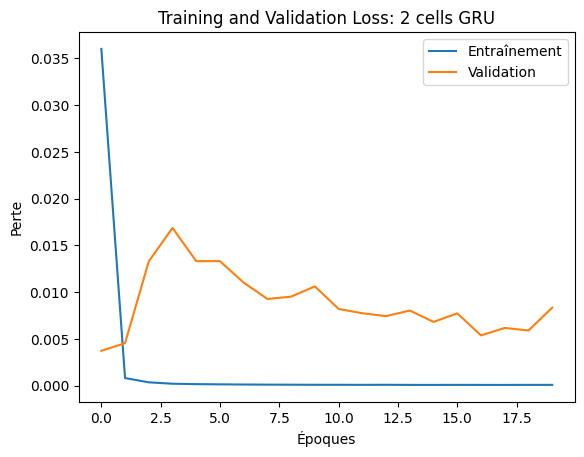

In [25]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_gru2.history['loss'], label='Entraînement')
plt.plot(history_gru2.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: 2 cells GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

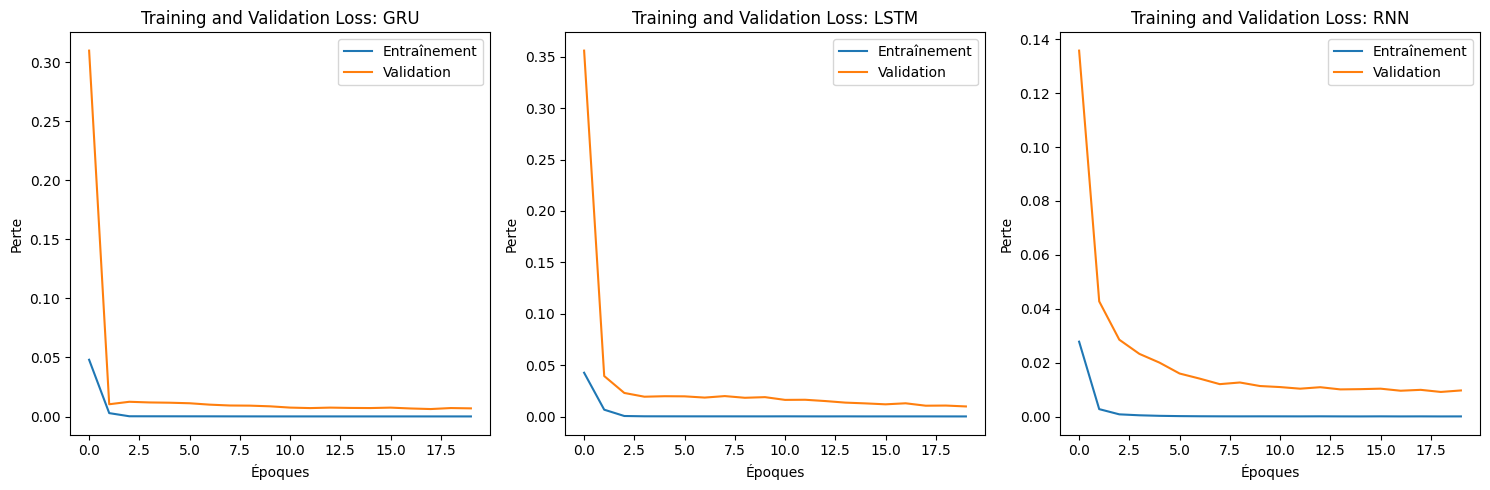

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Sous-graphe 1 : Perte pour GRU
plt.subplot(1, 3, 1)
# Tracer l'historique de l'entraînement
plt.plot(history_gru.history['loss'], label='Entraînement')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


# Sous-graphe 2 : Perte pour LSTM
plt.subplot(1, 3, 2)
# Tracer l'historique de l'entraînement
plt.plot(history_lstm.history['loss'], label='Entraînement')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


# Sous-graphe 2 : Perte pour RNN
plt.subplot(1, 3, 3)
# Tracer l'historique de l'entraînement
plt.plot(history_rnn.history['loss'], label='Entraînement')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Ajuster l'espace entre les sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.show()

